24MAI0111(ANMOL CHAUBEY) & 24MAI0113(MANISH RAWAT) 

In [69]:
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [112]:
img_size = (128, 128)  # Resize images to 128x128 pixels
batch_size = 32
data_dir = 'alzheimer detection.v1i.folder'

In [71]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [72]:
train_data = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),  # Adjust path for training data
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 6932 images belonging to 4 classes.


In [73]:
val_data = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),  # Adjust path for validation data
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1731 images belonging to 4 classes.


In [74]:
mmodel = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

In [75]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [77]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop]
)

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 172s 783ms/step - accuracy: 0.7058 - loss: 0.6437 - val_accuracy: 0.7181 - val_loss: 0.5444
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 112s 515ms/step - accuracy: 0.7235 - loss: 0.6072 - val_accuracy: 0.7262 - val_loss: 0.5262
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 110s 505ms/step - accuracy: 0.7063 - loss: 0.6352 - val_accuracy: 0.7215 - val_loss: 0.6377
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 124s 573ms/step - accuracy: 0.7076 - loss: 0.6374 - val_accuracy: 0.7210 - val_loss: 0.5338
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 187s 865ms/step - accuracy: 0.7240 - loss: 0.5874 - val_accuracy: 0.7481 - val_loss: 0.5162
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 153s 704ms/step - accuracy: 0.7260 - loss: 0.5978 - val_accuracy: 0.7239 - val_loss: 0.5214
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 182s 838ms/step - accuracy: 0.7273 - loss: 0.5730 - val_accuracy: 0.6886 - val_loss: 0.5636
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 150s 694ms/step - accuracy: 0.7235 -

In [78]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

55/55 ━━━━━━━━━━━━━━━━━━━━ 17s 315ms/step - accuracy: 0.7189 - loss: 0.5308
Validation Accuracy: 72.67%


In [79]:
predictions = np.argmax(model.predict(val_data), axis=-1)
true_labels = val_data.classes
class_labels = list(val_data.class_indices.keys())

55/55 ━━━━━━━━━━━━━━━━━━━━ 16s 292ms/step


In [80]:
print(classification_report(true_labels, predictions, target_names=class_labels))

                      precision    recall  f1-score   support

     Mild Impairment       0.25      0.23      0.24       422
 Moderate Impairment       0.25      0.26      0.26       441
       No Impairment       0.27      0.46      0.34       441
Very Mild Impairment       0.25      0.09      0.13       427

            accuracy                           0.26      1731
           macro avg       0.26      0.26      0.24      1731
        weighted avg       0.26      0.26      0.24      1731



In [81]:
confusion_mtx = confusion_matrix(true_labels, predictions)
print(confusion_mtx)

[[ 95 122 166  39]
 [ 97 116 190  38]
 [ 95 105 202  39]
 [ 99 113 177  38]]


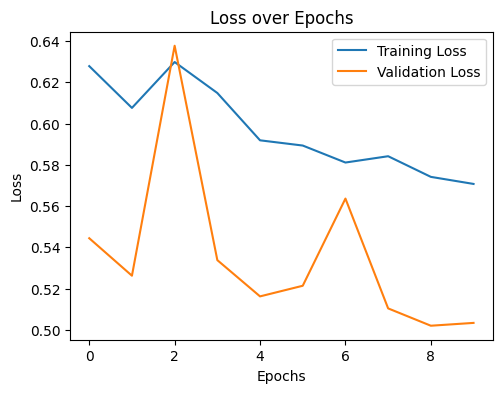

In [82]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

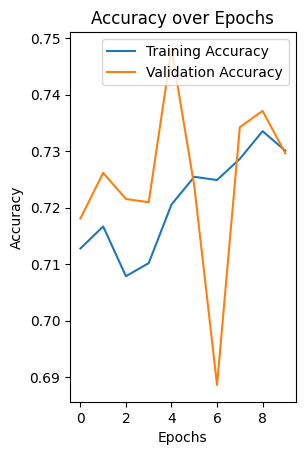

In [98]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [109]:
def display_brain_images(data_dir, num_images=6):
    classes = os.listdir(os.path.join(data_dir, 'train'))
    
    plt.figure(figsize=(15, 10))
    
    for i in range(num_images):
        # Randomly select a class
        selected_class = random.choice(classes)
        
        # Get images from the selected class directory
        image_files = os.listdir(os.path.join(data_dir, 'train', selected_class))
        
        # Randomly select an image
        img_file = random.choice(image_files)
        img_path = os.path.join(data_dir, 'train', selected_class, img_file)
        img = load_img(img_path, target_size=(128, 128))
        img_array = img_to_array(img) / 255.0

        plt.subplot(2, 3, i + 1)  # Arrange images in a grid
        plt.imshow(img_array)
        plt.axis('off')
        plt.title(f'Class: {selected_class}\nImage: {img_file}', fontsize=12)
    
    plt.tight_layout()
    plt.show()

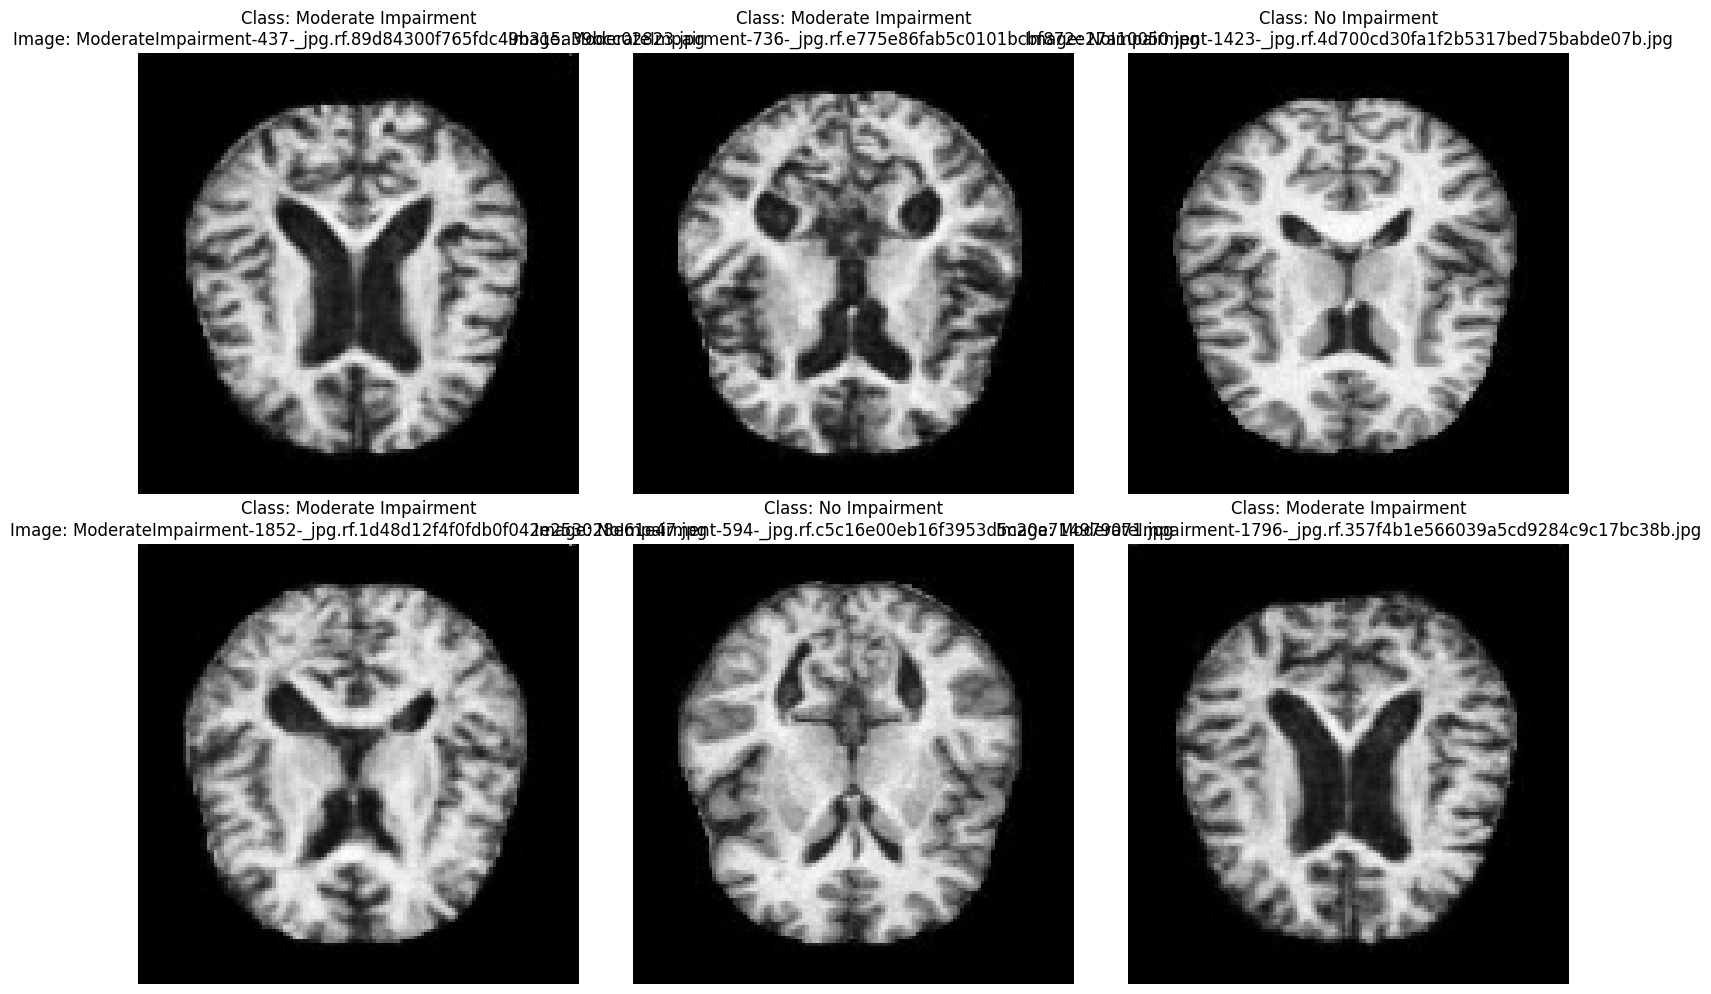

In [111]:
display_brain_images(data_dir, num_images=6)

In [107]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [113]:
model.save('my_model.h5')  # Saves the model in HDF5 format
